<a href="https://colab.research.google.com/github/islambusra010/final-dissertation-project/blob/main/final_porject_dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn shap lime xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c2456358988b1a604f2f177aa67995bd7435fdc0d1925dba07175ef539ba5c6f
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

file_path = "/content/drive/MyDrive/dissertation/data.csv"

df = pd.read_csv(file_path, sep=';')

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('\t', '', regex=False)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)


Shape: (4424, 37)

Columns:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
  

In [7]:
# -----------------------------------------------------
# STEP 1: Convert target variable to binary classification
# -----------------------------------------------------

# First, check the distribution of the original target classes
print("Original Target Distribution:")
print(df['Target'].value_counts())


# Remove students whose status is still 'Enrolled'
# These students do not yet have a final outcome (dropout or graduate)
df_binary = df[df['Target'] != 'Enrolled'].copy()


# Convert categorical target to binary numerical format
# Dropout = 1 (at-risk student)
# Graduate = 0 (successful completion)

df_binary['Target'] = df_binary['Target'].map({
    'Dropout': 1,
    'Graduate': 0
})


# Check the new target distribution after conversion
print("\nBinary Target Distribution:")
print(df_binary['Target'].value_counts())


# Check the new dataset shape after removing 'Enrolled'
print("\nNew Dataset Shape (after removing Enrolled):")
print(df_binary.shape)

Original Target Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Binary Target Distribution:
Target
0    2209
1    1421
Name: count, dtype: int64

New Dataset Shape (after removing Enrolled):
(3630, 37)


Class Distribution (Counts):
Target
0    2209
1    1421
Name: count, dtype: int64

Class Distribution (Percentages):
Target
0    60.853994
1    39.146006
Name: proportion, dtype: float64


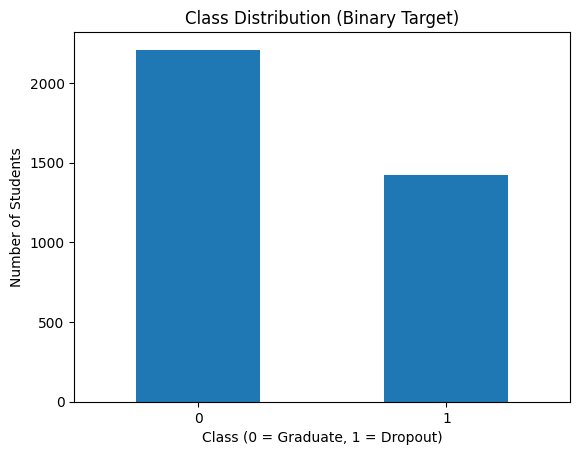

In [8]:
# -----------------------------------------------------
# STEP 2: Analyse class imbalance
# -----------------------------------------------------

import matplotlib.pyplot as plt

# Calculate class counts
class_counts = df_binary['Target'].value_counts()

# Calculate percentages
class_percentages = df_binary['Target'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):")
print(class_counts)

print("\nClass Distribution (Percentages):")
print(class_percentages)


# Plot bar chart
plt.figure()
class_counts.plot(kind='bar')

plt.title("Class Distribution (Binary Target)")
plt.xlabel("Class (0 = Graduate, 1 = Dropout)")
plt.ylabel("Number of Students")

plt.xticks(rotation=0)
plt.show()